<h1><center>Laboratorio 7: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matías Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Matías Villa
- Nombre de alumno 2: Cristobal Bravo


### **Link de repositorio de GitHub:** `https://github.com/matiasjvd/MDS7202-Laboratorio-de-Programacion-Cientifica-para-Ciencia-de-Datos.git`

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- Fecha de entrega: TBD
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\matia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [3]:
df_players = pd.read_csv('stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

In [4]:
Seleccion =[]
for position in df_players.National_Position:
    if type(position) != str:
        Seleccion.append('No seleccionado')
    else:
        Seleccion.append('Seleccionado')

df_players['Seleccion'] = Seleccion
df_players = df_players.drop(['National_Position'], axis=1)
df_players = df_players.drop(['Name'], axis=1)
df_players


,Nationality,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Seleccion
0,Portugal,LW,185,80,Right,32,High / Low,4,5,93,...,95,85,92,93,90,81,76,85,88,Seleccionado
1,Argentina,RW,170,72,Left,29,Medium / Medium,4,4,95,...,68,71,85,95,88,89,90,74,85,Seleccionado
2,Brazil,LW,174,68,Right,25,High / Medium,5,5,95,...,61,62,78,89,77,79,84,81,83,Seleccionado
3,Uruguay,ST,182,85,Right,30,High / Medium,4,4,91,...,69,77,87,94,86,86,84,85,88,Seleccionado
4,Germany,GK,193,92,Right,31,Medium / Medium,4,1,48,...,78,25,25,13,16,14,11,47,11,Seleccionado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Republic of Ireland,Sub,183,82,Right,19,Medium / Medium,1,1,12,...,56,14,16,13,13,11,13,15,12,No seleccionado
17584,Republic of Ireland,Sub,185,80,Right,19,Medium / Medium,2,1,13,...,53,12,17,12,11,12,13,16,12,No seleccionado
17585,England,Res,173,61,Right,18,High / Medium,2,2,44,...,61,41,44,28,42,35,36,42,37,No seleccionado
17586,Scotland,Sub,180,80,Right,21,Medium / Medium,3,1,17,...,48,15,23,14,12,13,12,24,12,No seleccionado


### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="https://c.tenor.com/SoXZJHWnhKAAAAAC/pitbull-medel.gif" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**Nota:** Si tiene problemas al utilizar OneHotEncoder puede utilizar el parámetro handle_unknown='ignore'. Esto hace que en la codificación se omitan las categorias que no aparecen en el entrenamiento. Pregunta dudosa (no tiene puntaje), ¿esto tiene sentido a nivel de modelos?.

**To-Do:**

- [X] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [X] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [X] Crear 3 ``pipelines`` con diferentes clasificadores.
- [X] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [X] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

In [5]:
#Librerias para esta parte
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

#Seleccionamos las variables numericas
numericas = df_players.select_dtypes(include=['int64','float64']).columns
#Ahora la pasamos a formato lista
numericas = list(numericas)
st = StandardScaler()

#Seleccionamos las variables categoricas
categoricas = df_players.select_dtypes(include=['object']).columns
#Ahora la pasamos a formato lista
categoricas = list(categoricas)
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")

#Eliminamos la variable Work_Rate
categoricas.remove('Work_Rate')
categoricas.remove('Seleccion')
categoricas.remove('Club_Position')

#Seleccionamos las variable ordinales
ordinales = ['Work_Rate', 'Weak_foot', 'Skill_Moves'] 
etiquetas = [["Low / Low","Low / Medium","Low / High", "Medium / Low","Medium / Medium","Medium / High","High / Low","High / Medium","High / High"],[1,2,3,4,5],[1,2,3,4,5]]
oe = OrdinalEncoder(categories=etiquetas)
    
#Finalmente creamos el preprocesador, que es un objeto de la clase ColumnTransformer, el aplicara standarizacion a las variables numericas,  OneHotEncoding a las categoricas y
#OrdinalEncoding a las ordinales
preprocesador = ColumnTransformer([('numericas', st, numericas), ('categoricas', ohe, categoricas), ('ordinales', oe, ordinales)])
    



**Respuesta:**

In [6]:
#Segun lo visto en la guia de Scikit-Learn, los modelos que deberiamos utilizar son los siguientes: SVM, KNN y emsamble classifiers, en este caso utilizaremos Random Forest.
#Librerias para esta parte
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Ahora creamos los Pipelines para cada uno de los modelos que vamos a utilizar
model_forest = Pipeline([('preprocesador', preprocesador), ('modelo', RandomForestClassifier())])
model_svm = Pipeline([('preprocesador', preprocesador), ('modelo', SVC( kernel='linear'))])
model_knn = Pipeline([('preprocesador', preprocesador), ('modelo', KNeighborsClassifier())])

#No se entrenan aun:c


### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [X] Separar el conjunto de datos en entrenamiento y de prueba.
- [X] Entrenar los `pipelines`.
- [X] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

In [7]:
# Importamos las librerias necesarias para el entrenamiento y las metricas de desempeño
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#Creamos los conjuntos de entrenamiento y prueba con un 33% para el conjunto de prueba
X = df_players.drop(columns = ['Seleccion'], axis=1)
y = df_players['Seleccion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42, stratify = y )


In [8]:
df_players['Seleccion']

0           Seleccionado
1           Seleccionado
2           Seleccionado
3           Seleccionado
4           Seleccionado
              ...       
17583    No seleccionado
17584    No seleccionado
17585    No seleccionado
17586    No seleccionado
17587    No seleccionado
Name: Seleccion, Length: 17588, dtype: object

In [9]:
#Ahora entrenamos los modelos, partiremos con el Random Forest
model_forest.fit(X_train, y_train)
#Veamos sus resultados
y_pred = model_forest.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

No seleccionado       0.94      1.00      0.97      5450
   Seleccionado       0.58      0.09      0.15       355

       accuracy                           0.94      5805
      macro avg       0.76      0.54      0.56      5805
   weighted avg       0.92      0.94      0.92      5805



In [10]:
#Ahora veamos el desempeño del SVM
model_svm.fit(X_train, y_train)
#Veamos sus resultados
y_pred = model_svm.predict(X_test)
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

No seleccionado       0.95      0.99      0.97      5450
   Seleccionado       0.64      0.17      0.27       355

       accuracy                           0.94      5805
      macro avg       0.79      0.58      0.62      5805
   weighted avg       0.93      0.94      0.93      5805



In [11]:
#Ahora veamos el desempeño del KNN
model_knn.fit(X_train, y_train)
#Veamos sus resultados
y_pred = model_knn.predict(X_test)
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

No seleccionado       0.94      1.00      0.97      5450
   Seleccionado       0.57      0.06      0.11       355

       accuracy                           0.94      5805
      macro avg       0.75      0.53      0.54      5805
   weighted avg       0.92      0.94      0.92      5805



**Respuesta**:

```
Podemos ver que para todos los modelos obtuvimos un desempeño muy bueno en la clasificacion de los jugadores que no fueron seleccionados, pero no tan bueno para los jugadores que si fueron seleccionados, esto se debe a que la cantidad de jugadores que no fueron seleccionados es mucho mayor que la cantidad de jugadores que si lo fueron. Este problema podria ser resuelto con algun modelo que considerara este desbalance en los datos o realizando un oversampling con alguna tecnica. Hay que considerar que para este caso si solo usaramos el accuracy como metrica estariamos muy sesgados, puesto que por este desbalance si el modelo arrajara que todos los jugadores son No seleccionados se obtendria un accuracy muy alto, lo cual no tiene sentido, puesto que en realidad no esta clasificando.
```

## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**Nota:** Clasifique solamente con las clases señaladas, si observa mas clases eliminelas de la clasficación.

**To-Do**:

- [ ] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [ ] Cuente cuantos por clase quedan.
- [ ] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [ ] Comente los resultados obtenidos.

**Respuesta:**

In [12]:
#Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.

ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']

dict_posiciones = {'ataque':ataque,'central_ataque':central_ataque,'central':central,
                    'central_defensa':central_defensa,'defensa':defensa,'arquero':arquero}


def posicion(string):
    global dict_posiciones
    n = len(dict_posiciones)
    answer = 0
    for k in range(n):
        if string in list(dict_posiciones.values())[k]:
            answer = list(dict_posiciones.keys())[k]
    if answer == 0:
        return 'Sin Posición'
    else:
        return answer

df_players['Posicion'] = df_players.Club_Position.apply(posicion)

defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: Posicion, dtype: int64


<AxesSubplot:>

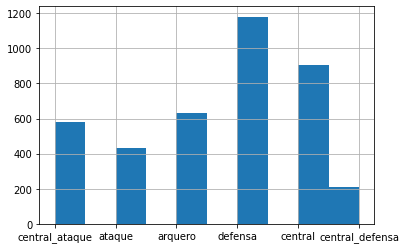

In [13]:
#Cuente cuantos por clase quedan.

print(df_players[df_players.Posicion != 'Sin Posición'].Posicion.value_counts())
df_players[df_players.Posicion != 'Sin Posición'].Posicion.hist()

In [14]:
#Entrene el nuevo pipeline y ejecute una evaluación de este.

#Notemos que según los pasos indicados en la imagen de la librería ScikitLearn los modelos a utilizar
#deben ser los mismos.

df_pos = df_players.copy()
df_pos = df_pos[df_pos.Posicion != 'Sin Posición']
df_pos = df_pos.drop('Seleccion',axis = 1)
df_pos = df_pos.drop('Club_Position',axis = 1)

num = df_pos.select_dtypes(include=['int64','float64']).columns.to_list()
cat = df_pos.select_dtypes(include=['object']).columns.to_list()
cat.remove('Work_Rate')
cat.remove('Posicion')

list_preprocess = [('numericas', st, num), ('categoricas', ohe, cat), ('ordinales', oe, ordinales)]
preprocess = ColumnTransformer(list_preprocess)

model_forest_2 = Pipeline([('preprocesador', preprocess), ('modelo', RandomForestClassifier())])
model_svm_2 = Pipeline([('preprocesador', preprocess), ('modelo', SVC( kernel='linear'))])
model_knn_2 = Pipeline([('preprocesador', preprocess), ('modelo', KNeighborsClassifier())])

modelos = [model_forest_2,model_svm_2,model_knn_2]
models_names = ['Random Forest','SVC','KNN']

X_2 = df_pos.drop(columns = ['Posicion'], axis=1)
y_2 = df_pos['Posicion']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.333,
                                                            shuffle=True, random_state=30, stratify = y_2)

for n_modelo,modelo in zip(models_names,modelos):
    modelo.fit(X_train_2,y_train_2)
    y_predict_2 = modelo.predict(X_test_2)
    print("#"*50)
    print("\nResultados modelo "+n_modelo+"\n")
    print(classification_report(y_test_2, y_predict_2))
    print("#"*50+"\n\n\n")

##################################################

Resultados modelo Random Forest

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       210
         ataque       0.80      0.89      0.84       143
        central       0.58      0.67      0.62       302
 central_ataque       0.55      0.26      0.36       194
central_defensa       0.42      0.07      0.12        70
        defensa       0.77      0.96      0.86       393

       accuracy                           0.74      1312
      macro avg       0.69      0.64      0.63      1312
   weighted avg       0.72      0.74      0.71      1312

##################################################



##################################################

Resultados modelo SVC

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       210
         ataque       0.78      0.89      0.83       143
        central       0.56      0.62     

**Respuesta**:


Los resultados son ~~sospechosamente~~ muy buenos. Siendo el mejor el modelo de Máquina de Soporte Vectorial (SVC). Notamos que en este caso las categorías generadas están mucho más balanceadas que las generadas en el punto 1.1 lo que hace mucho más fácil para los modelos extraer la información necesaria para generar buenas predicciones.


## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [X] Explique en que consiste la métrica $R^2$
- [X] Generar un pipeline para la regresión.
- [X] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [X] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

Explique en que consiste la métrica $R^2$

Respuesta:

La métrica $R^2$, conocida como el coeficiente de determinación, es un 'score' que busca medir la bondad de ajuste de un modelo de regresión, entregando valor 1 en el caso de una regresión perfecta y entregando valor 0 cuando (en el caso de una variable a regresionar y no-constante) se genera una predicción constante igual al promedio de la variable explicativa. Cabe destacar que esta métrica puede tener valores negativos cuando se trata de una "muy mala" predicción.

La fórmula general de esta métrica, que es típicamente utilizada en modelos de regresión lineal es:

$$ R^{2} = \frac{\sigma^{2}_{y true,y pred}}{\sigma^{2}_{y true}\sigma^{2}_{y pred}}  $$

Donde $\sigma^{2}_{y true,y pred}$ es la covarianza entre y_true e y_pred

y donde $\sigma^{2}_{y true}$, $\sigma^{2}_{y pred}$ son las varianzas de y_true e y_pred respectivamente.

In [15]:
df_sueldos = pd.read_csv('sueldos.csv')
df_players = pd.read_csv('stats_players.csv')
#Ahora haremos un merge entre estos dataframes en las variables Name y Player
df = pd.merge(df_players, df_sueldos, left_on='Name', right_on='Player')
#Eliminamos variables que no nos sirven
df = df.drop(['Name', 'Player'], axis=1)

In [16]:
#Ahora generamos un Pipeline para preprocesar los datos y un Pipeline para el modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
#Ahora creamos los Pipelines para cada uno de los modelos que vamos a utilizar usando el preprocesador que creamos anteriormente
model_forest = Pipeline([('preprocesador', preprocesador), ('modelo', RandomForestRegressor())])
model_linear = Pipeline([('preprocesador', preprocesador), ('modelo', linear_model.LinearRegression())])

In [17]:
#Ahora creamos los conjuntos de entrenamiento y prueba con un 33% para el conjunto de prueba
X = df.drop(columns = ['Weekly Salary'], axis=1)
y = df['Weekly Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
#Ahora entrenamos el modelo de Random Forest
model_forest.fit(X_train, y_train)
#Evaluamos el modelo
y_pred = model_forest.predict(X_test)
print('R2: ', r2_score(y_test, y_pred))

R2:  0.4464742559787428


**Respuesta**:

```
Claramente se pueden mejorar estos resultados, se podrian crear nuevas variables y realizar una limpieza mucho mas detallada de los datos, ademas si hubieramos realizado un mejor EDA posiblemente podriamos haber encontrado cosas interesantes para el modelo, ademas no se modificaron los hiperparametros, por lo cual si hubieramos seleccionado mejor estos podriamos haber obtenido resultados mucho mejores.
```

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>